# **STAT W5243: Applied Data Science - Project 1: Korean Drama Analysis**
### Team 12: Shayan Chowdhury (sc4040), Mengyan Li (ml4779), Zishun Shen (zs2695), Zhisheng Yang (zy2675)
### <font color='blue'>February 19, 2025</font>

# Introduction
Motivation (TODO: @Mengyan)

# Data
Data Acquisition
Dataset(s) description
- https://www.kaggle.com/datasets/chanoncharuchinda/korean-drama-2015-23-actor-and-reviewmydramalist
    - 2 datasets: kdramas + reviews (not merged)
- https://www.kaggle.com/datasets/noorrizki/top-korean-drama-list-1500
- https://www.kaggle.com/datasets/gianinamariapetrascu/top-100-k-drama-2023
- https://www.statista.com/statistics/831717/south-korea-film-industry-sales-revenue/

# Methodology

In [342]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Datasets 1-3: Korean Dramas from 2015-2023
Merging these 3 datasets, all containing varying information on Korean Dramas from 2015-2023, but mergable on the title (and year) columns.
- https://www.kaggle.com/datasets/chanoncharuchinda/korean-drama-2015-23-actor-and-reviewmydramalist
- https://www.kaggle.com/datasets/noorrizki/top-korean-drama-list-1500
- https://www.kaggle.com/datasets/gianinamariapetrascu/top-100-k-drama-2023

In [347]:
# Load dataset 1 (korean dramas from 2015-2023: https://www.kaggle.com/datasets/chanoncharuchinda/korean-drama-2015-23-actor-and-reviewmydramalist)
df_kdramas_1 = pd.read_csv("./data/raw/korean_drama.csv")

# Rename the drama_name column to title, will be useful later
df_kdramas_1 = df_kdramas_1.rename(columns={"drama_name": "title"})

df_kdramas_1

,kdrama_id,title,year,director,screenwriter,country,type,tot_eps,duration,start_dt,end_dt,aired_on,org_net,content_rt,synopsis,rank,pop
0,661d4193916c4e71a2c70473ab11e9e8,Sing My Crush,2023,['So Joon Moon'],NaN,South Korea,Drama,8,1500.0,"Aug 2, 2023","Aug 2, 2023",Wednesday,NaN,Not Yet Rated,Follow the story of acquaintances Ba Ram and H...,1484,2238
1,5ffcbeaa17114714af1959129984274c,D.P. Season 2,2023,NaN,['Kim Bo Tong'],South Korea,Drama,6,3000.0,"Jul 28, 2023","Jul 28, 2023",Friday,Netflix,15+ - Teens 15 or older,This unfolding story ensues when military dese...,164,1084
2,65075cb9c1a54be4a441cee6f16c9fdf,Shadow Detective Season 2,2023,['Han Dong Hwa'],"['Song Jung Woo', 'Hwang Seol Hun']",South Korea,Drama,8,3300.0,2023-07-05,2023-07-26,Wednesday,Disney+ Hulu,15+ - Teens 15 or older,Unfolds the ultimate counterattack of veteran ...,2443,6915
3,df0f0ac4b3ff4b15afa26f5a7a53a328,To Be Honest,2023,NaN,NaN,South Korea,Drama,3,600.0,2023-06-30,2023-07-14,Friday,NaN,Not Yet Rated,Don't you have those days where the whole univ...,49895,99999
4,04c1fe41948e464fb440001831d74d41,Celebrity,2023,['Kim Chul Gyu'],['Kim Yi Young'],South Korea,Drama,12,2700.0,"Jun 30, 2023","Jun 30, 2023",Friday,Netflix,18+ Restricted (violence & profanity),Fame. Money. Power. One young woman fights to ...,826,547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747,e8c09f0f7d0d4b75a4642eb06d76d811,"Kill Me, Heal Me",2015,"['Kim Jin Man', 'Kim Dae Jin']",['Jin Soo Wan'],South Korea,Drama,20,3720.0,2015-01-07,2015-03-12,"Wednesday, Thursday",MBC,15+ - Teens 15 or older,A traumatic childhood experience leaves Cha Do...,232,29
1748,1e7f7f2fa45d4240b8bb585ca13040f0,Enchanting Neighbor,2015,['Park Kyung Ryul'],['Park Hye Ryun'],South Korea,Drama,120,2100.0,2015-01-05,2015-06-22,"Monday, Tuesday, Wednesday, Thursday, Friday",SBS,15+ - Teens 15 or older,"Gong Soo Rae only love her husband, Seo Bong G...",47882,10759
1749,142a09741fdd4daa878d6ae007201e43,Iron Lady Cha,2015,"['Jang Joon Ho', 'Oh Hyun Chang']",['Seol Kyung Eun'],South Korea,Drama,111,2400.0,2015-01-05,2015-06-12,"Monday, Tuesday, Wednesday, Thursday, Friday",MBC,15+ - Teens 15 or older,People born as a member of the baby boomer gen...,58155,14841
1750,9170c31a02014b56bb4cec2105086f00,The Family Is Coming,2015,['Joo Dong Min'],['Kim Shin Hye'],South Korea,Drama,20,3600.0,2015-01-03,2015-03-15,"Saturday, Sunday",SBS,15+ - Teens 15 or older,A grandma has abandoned her family 50 years ag...,7995,4289


In [350]:
# Load in dataset 2 (top 1500 kdramas: https://www.kaggle.com/datasets/noorrizki/top-korean-drama-list-1500)
df_kdramas_2 = pd.read_csv("./data/raw/kdrama_list.csv", index_col=0)

# Merge datasets 1 + 2
df_kdramas_12 = df_kdramas_2.merge(df_kdramas_1, left_on='Name', right_on='title', how='outer')

# Columns to merge ('new': 'original)
cols_to_merge = {
    'Sinopsis': 'synopsis',
    'Year': 'year',
    'Name': 'title',
    'Content Rating': 'content_rt',
    # 'Genre': 'genre',
    'Network': 'org_net'
}
# Fill missing values in the original columns with the new columns, and drop the new columns
for col, new_col in cols_to_merge.items():
    df_kdramas_12[new_col] = df_kdramas_12[new_col].fillna(df_kdramas_12[col])
    df_kdramas_12.drop(columns=[col], inplace=True)

# Fill missing values in the tot_eps column with the Episode column
# (separate from for loop above because it requires string parsing)
df_kdramas_12['tot_eps'] = df_kdramas_12['tot_eps'].fillna(df_kdramas_12['Episode'].str.split(' ').str[0].astype(float))
df_kdramas_12.drop(columns=['Episode'], inplace=True)

# If there are duplicate titles with the year, only keep the first row
df_kdramas_12 = df_kdramas_12.groupby(['title', 'year']).first().reset_index()

print('Dataset 1 length:', len(df_kdramas_1))
print('Dataset 2 length:', len(df_kdramas_2))
print('Merged dataset (1+2) length:', len(df_kdramas_12))
df_kdramas_12.isna().sum()

Dataset 1 length: 1752
Dataset 2 length: 1647
Merged dataset (1+2) length: 2302


title              0
year               0
Genre            659
Main Cast        659
Score            659
Tags             678
img url          659
kdrama_id        550
director        1266
screenwriter    1343
country          550
type             550
tot_eps            0
duration         574
start_dt         550
end_dt           550
aired_on         782
org_net          299
content_rt         0
synopsis         168
rank             550
pop              550
dtype: int64

In [351]:
# Load in dataset 3 (top 100 kdramas of 2023: https://www.kaggle.com/datasets/gianinamariapetrascu/top-100-k-drama-2023)
df_kdramas_3 = pd.read_csv("./data/raw/top100_kdrama.csv", index_col=0)
df_kdramas_3['year'] = 2023

# Find any common columns to merge on
common_cols = list(set(df_kdramas_3.columns) & set(df_kdramas_12.columns))

# Merge datasets 1 + 2 + 3
df_kdramas_123 = df_kdramas_3.merge(
    df_kdramas_12, 
    # left_on='Title', right_on='title', 
    left_on=common_cols + ['Title'], 
    right_on=common_cols + ['title'], 
    how='outer')

# Columns to merge ('new': 'original)
cols_to_merge = {
    'Synopsis': 'synopsis',
    'Title': 'title',
    'Episodes': 'tot_eps',
    'Start_date': 'start_dt',
    'End_date': 'end_dt',
    'Day_aired': 'aired_on',
    'Popularity': 'pop',
    'Duration': 'duration',
    'Rank': 'rank',
    'Main Role': 'Main Cast',
}
# Fill missing values in the original columns with the new columns, and drop the new columns
for col, new_col in cols_to_merge.items():
    df_kdramas_123[new_col] = df_kdramas_123[new_col].fillna(df_kdramas_123[col])
    df_kdramas_123.drop(columns=[col], inplace=True)

# Date formats seem to be very unstandardized (e.g, Aug  2, 2023,  2015-01-09)
# --> Reformat the start_dt and end_dt to standard YYYY-MM-DD format
for col in ['start_dt', 'end_dt']:
    df_kdramas_123[col] = pd.to_datetime(df_kdramas_123[col], format='mixed', errors='coerce')
    df_kdramas_123[col] = df_kdramas_123[col].dt.strftime('%Y-%m-%d')

# If there are duplicate titles with the year, only keep the first row
df_kdramas_123 = df_kdramas_123.groupby(['title', 'year']).first().reset_index()

print('Original merged dataset (Dataset 1 + 2) length:', len(df_kdramas_12))
print('New Dataset 3 length:', len(df_kdramas_3))
print('Merged dataset (1+2+3) length:', len(df_kdramas_123))
df_kdramas_123.isna().sum()

Original merged dataset (Dataset 1 + 2) length: 2302
New Dataset 3 length: 100
Merged dataset (1+2+3) length: 2402


title              0
year               0
Genre            659
Tags             678
Score            659
Watchers        2302
Main Cast        659
img url          759
kdrama_id        650
director        1366
screenwriter    1443
country          650
type             650
tot_eps            0
duration         574
start_dt         553
end_dt           565
aired_on         782
org_net          399
content_rt       100
synopsis         168
rank             550
pop              550
dtype: int64

In [352]:
df_kdramas = df_kdramas_123

### Exploratory Data Analysis + Data Cleaning

In [335]:
# First of all, let's check for empty values in the dataset and see how we should handle them
df_kdramas_cleaned.isna().sum()

title              0
year               0
Genre             76
Tags              81
Score             76
Watchers        1164
Main Cast         76
img url          176
kdrama_id        100
director         347
screenwriter     390
country          100
type             100
tot_eps            0
duration           0
start_dt           0
end_dt            12
aired_on          62
org_net          123
content_rt       100
synopsis           4
rank               0
pop                0
dtype: int64

In [124]:
# from scrape_mydramalist import scrape_drama_info
# from tqdm.auto import tqdm
# import time
# import random

# # Get rows where at least one of director, screenwriter, or synopsis is missing
# missing_info_mask = df_kdramas_cleaned[['director', 'screenwriter', 'synopsis']].isna().any(axis=1)
# rows_with_missing = df_kdramas_cleaned[missing_info_mask][2:]

# # Loop through only those rows with missing values
# for idx, row in tqdm(rows_with_missing.iterrows(), total=len(rows_with_missing), desc="Scraping drama info"):
#     print(f"Scraping info for {row['drama_name']}...")
#     director, screenwriter, synopsis = scrape_drama_info(row['drama_name'])
    
#     # Update only if values are missing and we got new values
#     if pd.isna(row['director']) and director:
#         df_kdramas_cleaned.at[idx, 'director'] = [director]
#     if pd.isna(row['screenwriter']) and screenwriter:
#         df_kdramas_cleaned.at[idx, 'screenwriter'] = [screenwriter]
#     if pd.isna(row['synopsis']) and synopsis:
#         df_kdramas_cleaned.at[idx, 'synopsis'] = synopsis
        
#     # Add a small delay to avoid overwhelming the server
#     time.sleep(random.uniform(1, 3))

### Exploratory Data Analysis

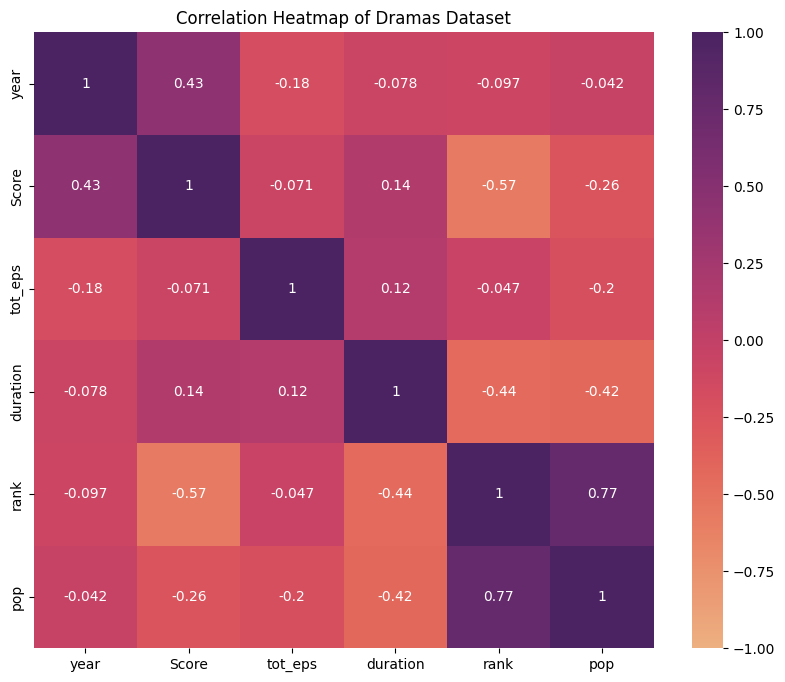

In [354]:
# Plot a heatmap of the correlation matrix of the dramas dataset between all numerical columns
import seaborn as sns

# Get numerical columns
numerical_cols = df_kdramas.select_dtypes(include=[np.number]).columns

# Compute correlation matrix
corr_matrix = df_kdramas[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='flare', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Dramas Dataset')
plt.show()

Notable findings from the correlation matrix/heatmap above: 

- The strongest positive correlation (0.77) exists between `rank` and `pop` (popularity), suggesting that as a drama's popularity increases, its rank number also increases
- `duration` shows moderate negative correlations with both `rank` (-0.44) and `pop` (-0.42), indicating that longer dramas tend to have lower rank numbers and lower popularity scores—and thereby, that viewers may prefer shorter dramas
- The `year` variable shows very weak correlations with most other variables (all correlations are near 0), suggesting that the year of release doesn't strongly influence other characteristics

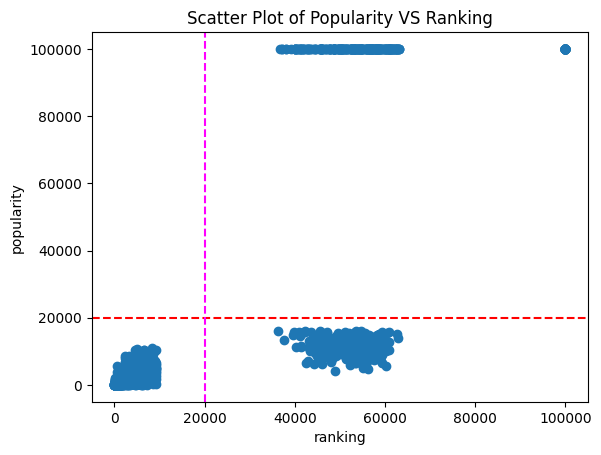

In [ ]:
# Plot scatter plot of ranking vs popularity
plt.scatter(df_kdramas['rank'], df_kdramas['pop'])
plt.title('Scatter Plot of Popularity VS Ranking')
plt.xlabel('ranking')
plt.ylabel('popularity')

# Make a horizontal line at y = 200000
plt.axhline(y=20000, color='red', linestyle='--')

# Make a vertical line at x = 20000
plt.axvline(x=20000, color='magenta', linestyle='--')

plt.show()

Number of dramas before removing outliers: 2402
Number of dramas after removing outliers: 1264


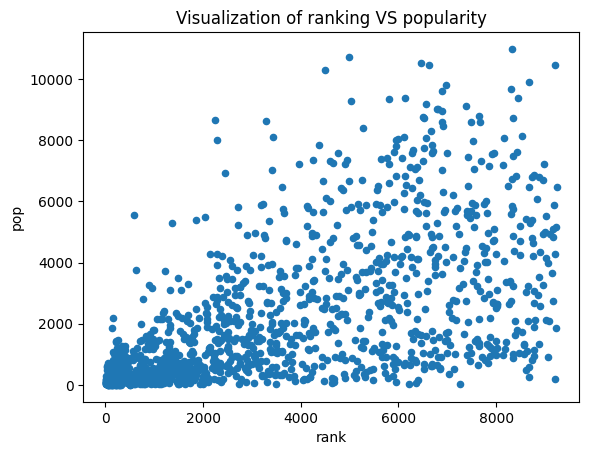

In [ ]:
# Seems like there are some large outliers in the data

# Remove outliers via threshold determined by the scatter plot 
# (everything above the red line and to the right of the magenta line)

print('Number of dramas before removing outliers:', len(df_kdramas))
df_kdramas_cleaned = df_kdramas[
    (df_kdramas['pop'] < 200000) &
    (df_kdramas['rank'] < 20000)
]
print('Number of dramas after removing outliers:', len(df_kdramas_cleaned))

# Plot histogram of popularity
df_kdramas_cleaned.plot(kind='scatter', x='rank', y='pop', title='Visualization of ranking VS popularity')
plt.show()

### Data Repopulation

In [ ]:
# Repopulate the dataset with missing info from mydramalist.com
from scripts.scrape_mydramalist import scrape_drama_info
from tqdm.auto import tqdm
import time
import random

# Get rows where at least one of director, screenwriter, or synopsis is missing
missing_info_mask = df_kdramas_cleaned[['director', 'screenwriter', 'synopsis']].isna().any(axis=1)
rows_with_missing = df_kdramas_cleaned[missing_info_mask][3:]

# Loop through only those rows with missing values
for idx, row in tqdm(rows_with_missing.iterrows(), total=len(rows_with_missing), desc="Scraping drama info"):
    print(f"Scraping info for {row['drama_name']}...")
    director, screenwriter, synopsis = scrape_drama_info(row['drama_name'])
    
    # Update only if values are missing and we got new values
    if pd.isna(row['director']) and director:
        df_kdramas_cleaned.at[idx, 'director'] = [director]
    if pd.isna(row['screenwriter']) and screenwriter:
        df_kdramas_cleaned.at[idx, 'screenwriter'] = [screenwriter]
    if pd.isna(row['synopsis']) and synopsis:
        df_kdramas_cleaned.at[idx, 'synopsis'] = synopsis
        
    # Add a small delay to avoid overwhelming the server
    time.sleep(random.uniform(1, 3))

## Dataset 4: Movie Industry Sales Revenue in South Korea 2014-2023
- https://www.statista.com/statistics/831717/south-korea-film-industry-sales-revenue/

In [404]:
df_revenue = pd.read_excel("./data/raw/statistic_id831717_movie-industry-sales-revenue-in-south-korea-2014-2023.xlsx", sheet_name="Data")
df_revenue.drop(columns=['Unnamed: 0'], inplace=True)
df_revenue.rename(columns={
    'Unnamed: 1': df_revenue.iloc[1]['Unnamed: 1'],
    'Unnamed: 2': df_revenue.iloc[2]['Unnamed: 1']
}, inplace=True)
df_revenue.drop(index=[0,1,2,3], inplace=True)

df_revenue

,Movie industry sales revenue in South Korea 2014-2023,Sales revenue of the film industry in South Korea from 2014 to 2023 (in trillion South Korean won)
4,2014,1.66
5,2015,1.72
6,2016,1.74
7,2017,1.76
8,2018,1.81
9,2019,1.91
10,2020,0.51
11,2021,0.58
12,2022,1.16
13,2023,1.26


In [416]:
# df_kdramas_numeric_cols = df_kdramas.select_dtypes(include=[np.number]).columns
df_kdramas[df_kdramas_numeric_cols].groupby('year').mean()

,Score,tot_eps,duration,rank,pop
year,,,,,
1995.0,7.900000,24.000000,NaN,NaN,NaN
1997.0,7.500000,16.000000,NaN,NaN,NaN
2000.0,7.650000,18.000000,NaN,NaN,NaN
2001.0,7.500000,22.000000,NaN,NaN,NaN
2002.0,7.185714,18.571429,NaN,NaN,NaN
2003.0,7.410000,22.600000,NaN,NaN,NaN
2004.0,7.258824,18.764706,NaN,NaN,NaN
2005.0,7.269565,25.608696,NaN,NaN,NaN
2006.0,7.374194,28.548387,NaN,NaN,NaN


## Dataset 5: Korean Dramas Reviews Dataset
- https://www.kaggle.com/datasets/chanoncharuchinda/korean-drama-2015-23-actor-and-reviewmydramalist

In [126]:
# Load in reviews dataset
df_reviews = pd.read_csv("./data/raw/reviews.csv")

# Remove rows with missing values on columns of interest
df_reviews = df_reviews.dropna(subset=['title', 'overall_score', 'review_text', 'ep_watched', 'n_helpful'])
print(f"Initial number of reviews: {len(df_reviews)}")

# Only keep reviews for dramas in our dataset
df_reviews = df_reviews[df_reviews['title'].isin(df_kdramas['drama_name'])]
print(f"Number of reviews after filtering with dramas in dataset 1: {len(df_reviews)}")
df_reviews

Initial number of reviews: 10619
Number of reviews after filtering with dramas in dataset 1: 10619


,user_id,title,story_score,acting_cast_score,music_score,rewatch_value_score,overall_score,review_text,ep_watched,n_helpful
0,c8ffdab3f2a338eeb54b265598dbbb55,Sing My Crush,9.0,9.0,10.0,9.0,9.0,the Best Song from my Crush This will now ran...,8 of 8 episodes seen,23
1,c8ffdab3f2a338eeb54b265598dbbb55,Happy Merry Ending,5.0,7.0,9.0,4.0,6.5,I'm Happy and Merry That it Ended Quickly The ...,8 of 8 episodes seen,31
2,c8ffdab3f2a338eeb54b265598dbbb55,Duty After School: Part 2,4.0,9.0,3.0,1.0,4.0,This PART 2 Should Never Have Happened If you...,4 of 4 episodes seen,121
3,c8ffdab3f2a338eeb54b265598dbbb55,Our Dating Sim,9.0,9.5,9.0,9.0,9.0,I want to play this dating sim! I want to pla...,8 of 8 episodes seen,79
4,c8ffdab3f2a338eeb54b265598dbbb55,The Director Who Buys Me Dinner,7.5,8.5,7.0,6.0,7.0,"Half-Cooked, Dont Eat A hard pass, unless som...",10 of 10 episodes seen,66
...,...,...,...,...,...,...,...,...,...,...
10620,33bb7ae6e00a345c927f1b8e39594908,Heart to Heart,8.0,9.0,7.0,9.0,9.0,it was a really good drama. highly recommended...,16 of 16 episodes seen,3
10621,e5d4bbe315b03eb4878aa84d2f4fcff0,"Kill Me, Heal Me",8.5,10.0,10.0,10.0,9.5,The only flaws I found in this drama were the ...,20 of 20 episodes seen,40
10622,43aaace8631f36eda17a1880c7329a82,"Kill Me, Heal Me",5.5,7.5,7.5,5.5,5.5,If you're looking for a well written drama abo...,20 of 20 episodes seen,29
10623,172b38a4599f3a649fe192fb967ce084,"Kill Me, Heal Me",9.0,10.0,10.0,8.0,9.5,"I started watching this drama, because of the ...",20 of 20 episodes seen,23


### Exploratory Data Analysis

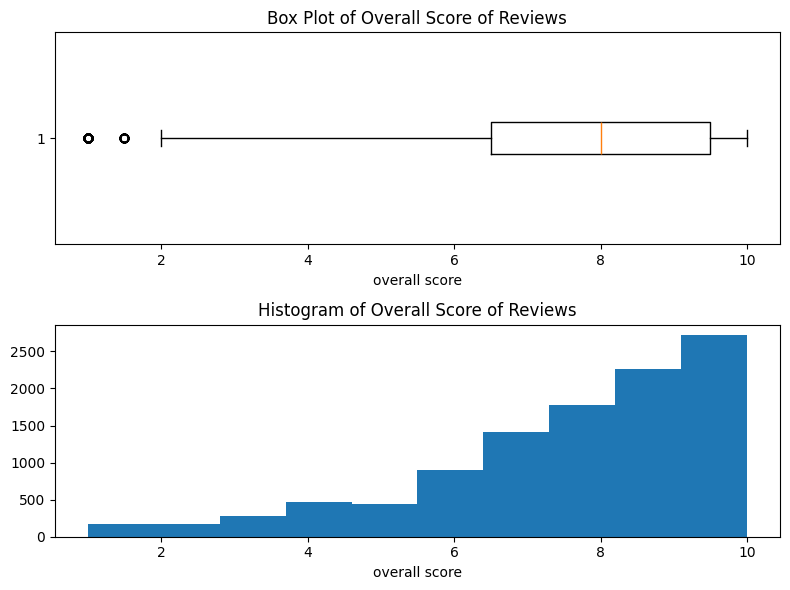

In [127]:
# Plot a box plot (horizontal) and histogram of the overall score of the reviews
fig, axs = plt.subplots(2, 1, figsize=(8, 6))
axs[0].boxplot(df_reviews['overall_score'], vert=False)
axs[0].set_title('Box Plot of Overall Score of Reviews')
axs[0].set_xlabel('overall score')
axs[1].hist(df_reviews['overall_score'])
axs[1].set_title('Histogram of Overall Score of Reviews')
axs[1].set_xlabel('overall score')
plt.tight_layout()
plt.show()

## Merging Korean Dramas Dataset with Reviews Dataset

In [357]:
# Merge the two datasets on the title column
df_kdramas_reviews = pd.merge(df_kdramas, df_reviews, on='title', how='outer')

# Display the merged dataset
df_kdramas_reviews

,title,year,Genre,Tags,Score,Watchers,Main Cast,img url,kdrama_id,director,...,pop,user_id,story_score,acting_cast_score,music_score,rewatch_value_score,overall_score,review_text,ep_watched,n_helpful
0,1% of Anything,2003.0,"Comedy, Romance","Arranged Relationship,, Love/Hate Relationship...",7.0,None,"Kang Dong Won, Kim Jung Hwa, Han Hye Jin, Lee ...",https://i.mydramalist.com/NdPpYc.jpg?v=1,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100 Days My Prince,2018.0,"Historical, Comedy, Romance, Drama","Amnesia,, Hidden Identity,, Marriage Of Conven...",8.3,None,"Doh Kyung Soo, Nam Ji Hyun, Kim Seon Ho, Han S...",https://i.mydramalist.com/p0yXrc.jpg?v=1,53c858d11a284859a1f50699b5aa6f51,"['Lee Jong Jae', 'Nam Sung Woo']",...,140.0,b13c5efdc2523a37b4dd238a802ebe8a,7.0,8.0,8.0,5.0,7.0,"As a valid fan of the actor Kyungsoo, I had to...",16 of 16 episodes seen,14.0
2,100 Days My Prince,2018.0,"Historical, Comedy, Romance, Drama","Amnesia,, Hidden Identity,, Marriage Of Conven...",8.3,None,"Doh Kyung Soo, Nam Ji Hyun, Kim Seon Ho, Han S...",https://i.mydramalist.com/p0yXrc.jpg?v=1,53c858d11a284859a1f50699b5aa6f51,"['Lee Jong Jae', 'Nam Sung Woo']",...,140.0,57f010032ba136f99d4f95befef7d00d,8.0,10.0,8.0,8.0,8.0,Talk about chemistry! D.O. and Nam Ji Hyun b...,16 of 16 episodes seen,7.0
3,100 Days My Prince,2018.0,"Historical, Comedy, Romance, Drama","Amnesia,, Hidden Identity,, Marriage Of Conven...",8.3,None,"Doh Kyung Soo, Nam Ji Hyun, Kim Seon Ho, Han S...",https://i.mydramalist.com/p0yXrc.jpg?v=1,53c858d11a284859a1f50699b5aa6f51,"['Lee Jong Jae', 'Nam Sung Woo']",...,140.0,637b678978cb3be09efeaf5f38daf016,8.0,9.5,8.0,7.5,8.5,I didn't expect to like this drama as much as ...,16 of 16 episodes seen,16.0
4,100 Days My Prince,2018.0,"Historical, Comedy, Romance, Drama","Amnesia,, Hidden Identity,, Marriage Of Conven...",8.3,None,"Doh Kyung Soo, Nam Ji Hyun, Kim Seon Ho, Han S...",https://i.mydramalist.com/p0yXrc.jpg?v=1,53c858d11a284859a1f50699b5aa6f51,"['Lee Jong Jae', 'Nam Sung Woo']",...,140.0,c543f89ef3303316869292d39971630c,6.0,7.0,7.0,5.5,6.5,"Yet another Joseon drama, that adds nothing. ....",16 of 16 episodes seen,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11771,Zombie Detective,2020.0,"Thriller, Mystery, Comedy, Fantasy","Investigation,, Nice Male Lead,, Strong Female...",8.2,None,"Choi Jin Hyuk, Park Ju Hyun, Tae Hang Ho, Lee ...",https://i.mydramalist.com/wz4R1_4c.jpg?v=1,31f0ed457f9e4989966116dc6ba7a0d0,['Shim Jae Hyun'],...,597.0,5d09e126700738f9aed098b6eab126cc,1.0,7.0,7.0,1.0,4.5,Stupid AF This is a show that relies only on ...,24 of 24 episodes seen,9.0
11772,Zombie Detective,2020.0,"Thriller, Mystery, Comedy, Fantasy","Investigation,, Nice Male Lead,, Strong Female...",8.2,None,"Choi Jin Hyuk, Park Ju Hyun, Tae Hang Ho, Lee ...",https://i.mydramalist.com/wz4R1_4c.jpg?v=1,31f0ed457f9e4989966116dc6ba7a0d0,['Shim Jae Hyun'],...,597.0,3d35a63bf011332f9b76e9e3bd01ffb6,9.0,9.0,10.0,8.0,9.0,Surprisingly Wholesome This is the first revi...,24 of 24 episodes seen,43.0
11773,Zombie Detective,2020.0,"Thriller, Mystery, Comedy, Fantasy","Investigation,, Nice Male Lead,, Strong Female...",8.2,None,"Choi Jin Hyuk, Park Ju Hyun, Tae Hang Ho, Lee ...",https://i.mydramalist.com/wz4R1_4c.jpg?v=1,31f0ed457f9e4989966116dc6ba7a0d0,['Shim Jae Hyun'],...,597.0,e1d35959b95c31c59fa372114c15837b,8.0,8.0,5.5,7.5,7.5,"Pure, Crazy Fun Despite how some of the still...",24 of 24 episodes seen,19.0
11774,Zombie Detective,2020.0,"Thriller, Mystery, Comedy, Fantasy","Investigation,, Nice Male Lead,, Strong Female...",8.2,None,"Choi Jin Hyuk, Park Ju Hyun, Tae Hang Ho, Lee ...",https://i.mydramalist.com/wz4R1_4c.jpg?v=1,31f0ed457f9e4989966116dc6ba7a0d0,['Shim Jae Hyun'],...,597.0,72816641021237e9af64a6917daa24d8,8.0,8.0,9.0,7.0,8.5,A Story About a Zombie You get the idea about...,24 of 24 episodes seen,20.0


## Exploratory Data Analysis

In [358]:
print("Summary statistics for numerical columns:")
df_kdramas_reviews.describe()

Summary statistics for numerical columns:


,year,Score,tot_eps,duration,rank,pop,story_score,acting_cast_score,music_score,rewatch_value_score,overall_score,n_helpful
count,11776.000000,10501.000000,11776.000000,11202.000000,11226.000000,11226.000000,10655.000000,10655.000000,10655.000000,10655.000000,10655.000000,10655.000000
mean,2018.843665,7.914780,19.058084,2875.641582,6463.969446,4638.864066,7.506429,8.447020,7.602206,6.175411,7.641764,15.614829
std,3.118429,0.529045,19.554339,1414.329569,13753.745778,16806.216284,2.220986,1.749744,2.187535,3.087154,2.108731,31.839587
min,1995.000000,6.500000,1.000000,30.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2017.000000,7.500000,10.000000,1800.000000,1040.250000,371.000000,6.000000,8.000000,6.500000,4.000000,6.500000,2.000000
50%,2019.000000,7.900000,16.000000,3600.000000,2749.000000,996.000000,8.000000,9.000000,8.000000,7.000000,8.000000,6.000000
75%,2021.000000,8.300000,17.000000,4140.000000,5798.000000,2253.750000,9.000000,10.000000,9.500000,9.000000,9.500000,15.000000
max,2023.000000,9.200000,210.000000,9180.000000,99999.000000,99999.000000,10.000000,10.000000,10.000000,10.000000,10.000000,551.000000


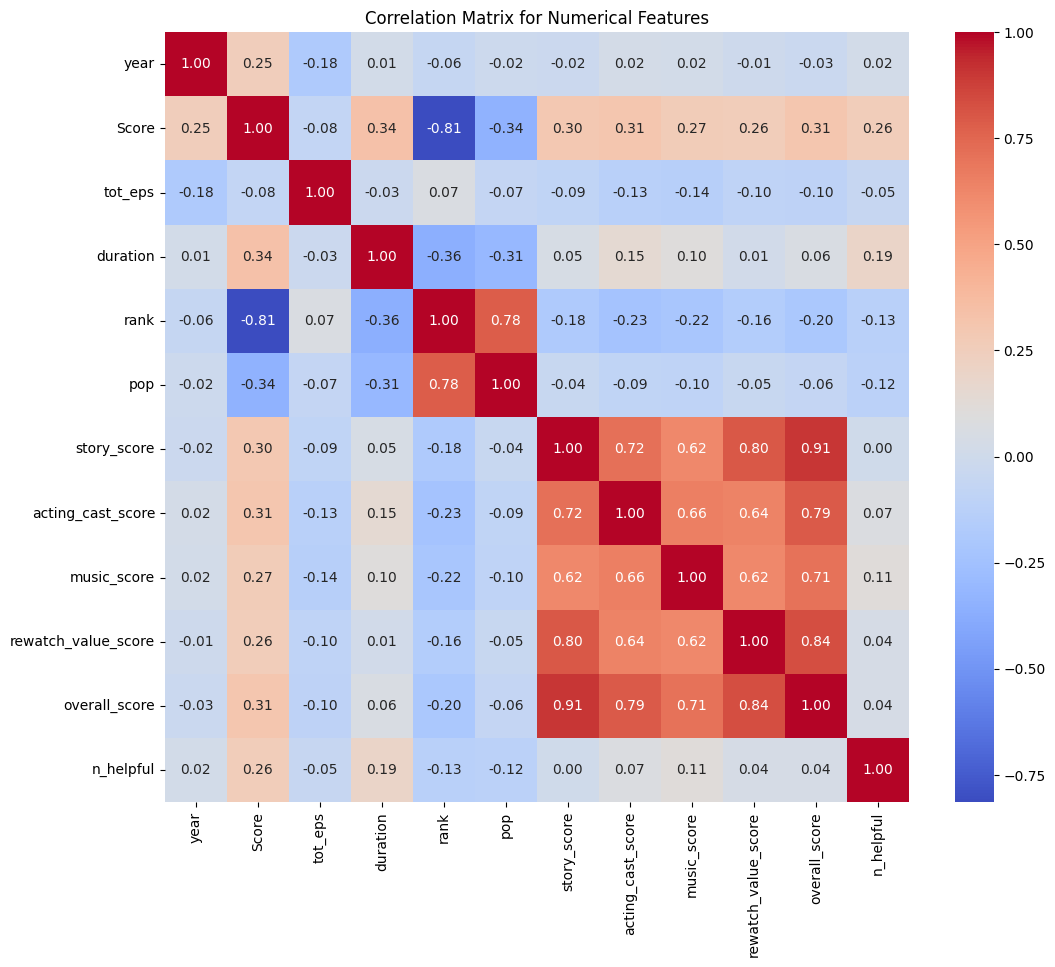

In [359]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Matrix
# Select numerical columns only
num_cols = df_kdramas_reviews.select_dtypes(include=[np.number]).columns
corr = df_kdramas_reviews[num_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Numerical Features")
plt.show()

Notable findings from this correlation matrix/heatmap above: 
- `overall_score` has very strong **positive correlations** with `story_score` (0.91), `rewatch_value_score` (0.84), `acting_cast_score` (0.79), and `music_score` (0.71)—which is to be expected, people who enjoy the story, acting, and music are more likely to enjoy the drama overall
- Interestingly enough, `rank` has moderate **negative correlations** with the various score components (around -0.3 to -0.34) but no particularly strong correlations with `pop` (popularity). Since we saw a positive correlation between `rank` and `pop` in the previous heatmap, this is slightly surprising. 
- Once again as seen above, `duration` has **negative correlations** with `rank` (-0.40) and `pop` (-0.38)

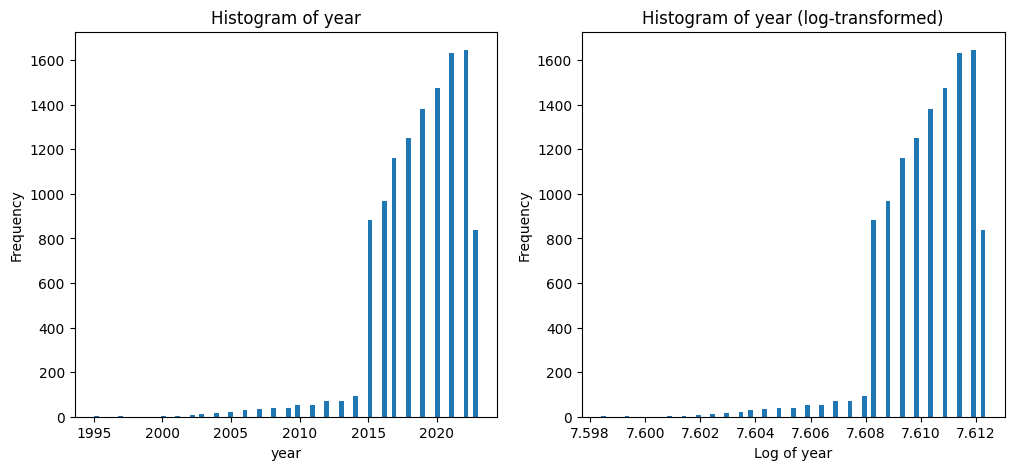

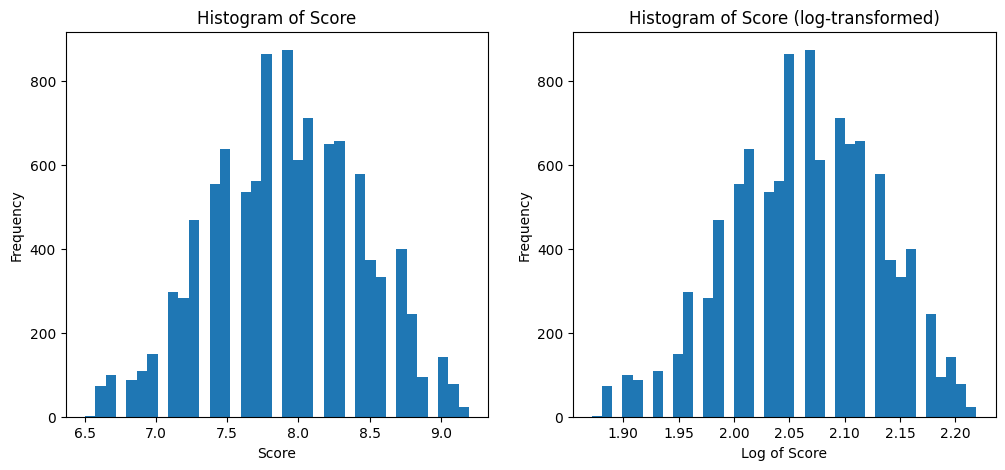

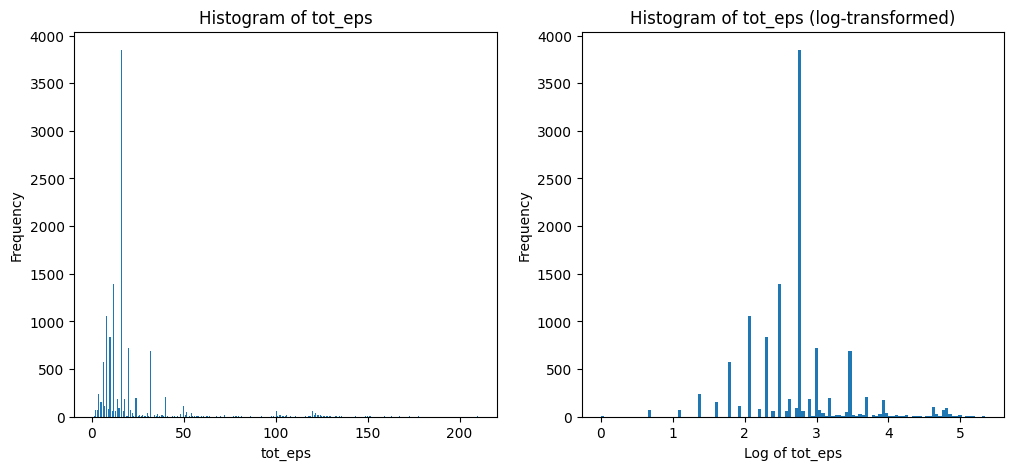

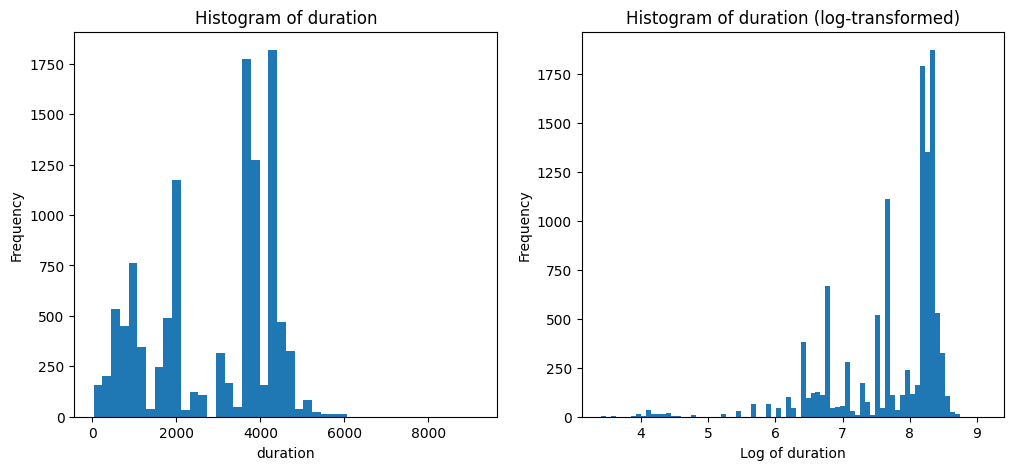

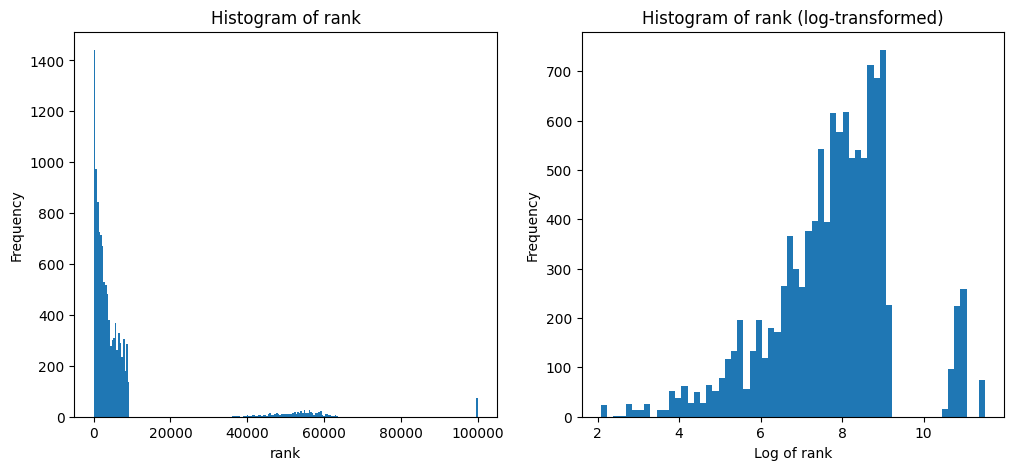

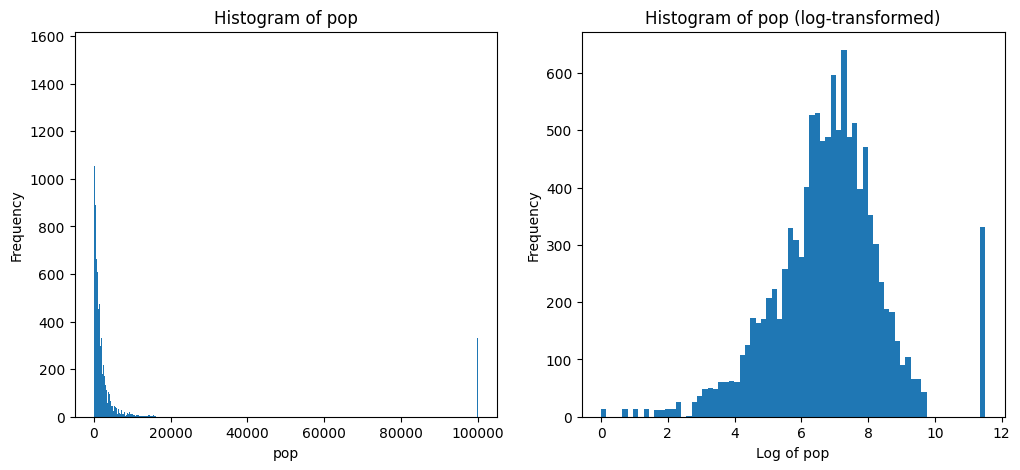

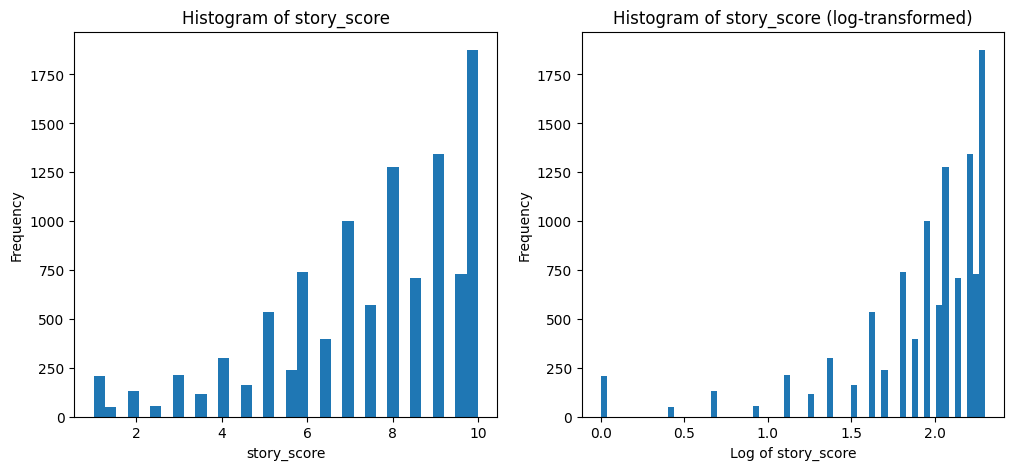

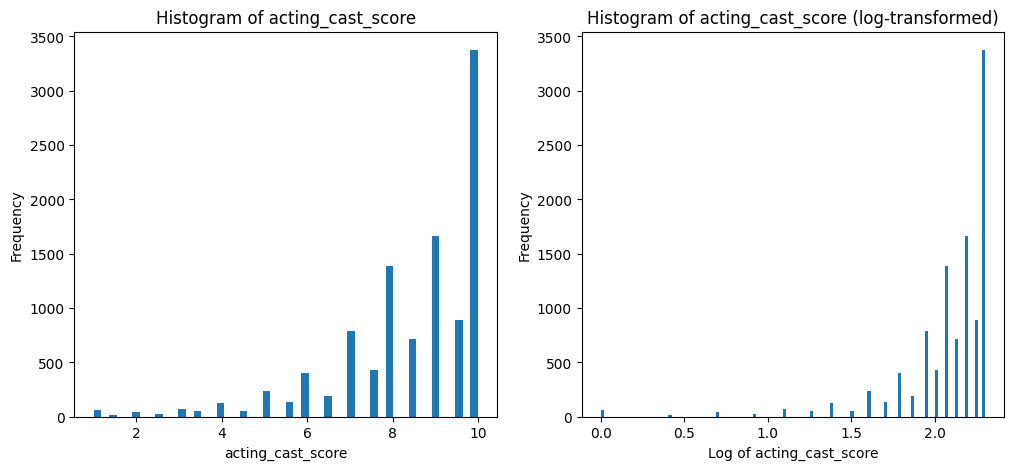

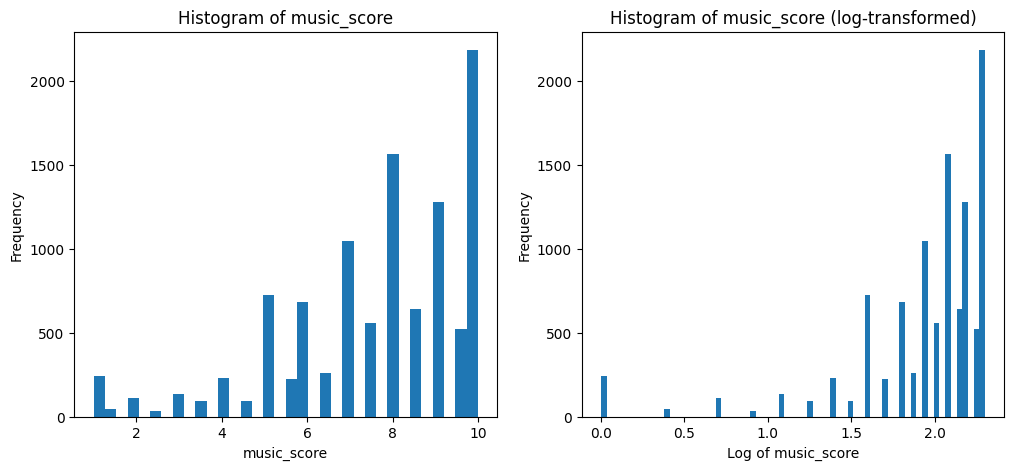

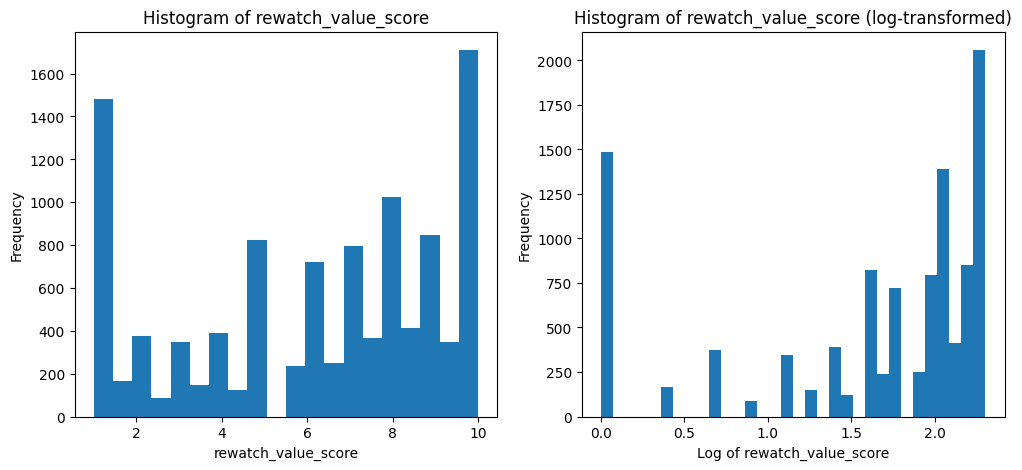

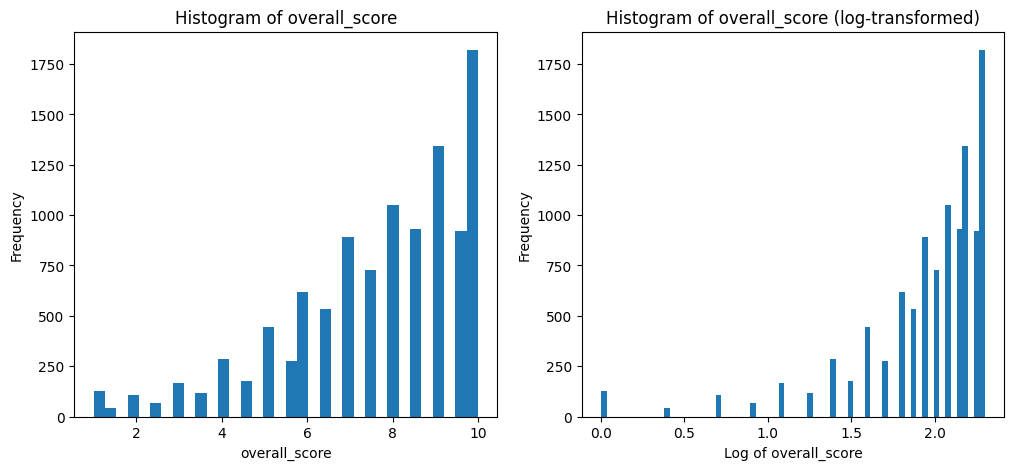

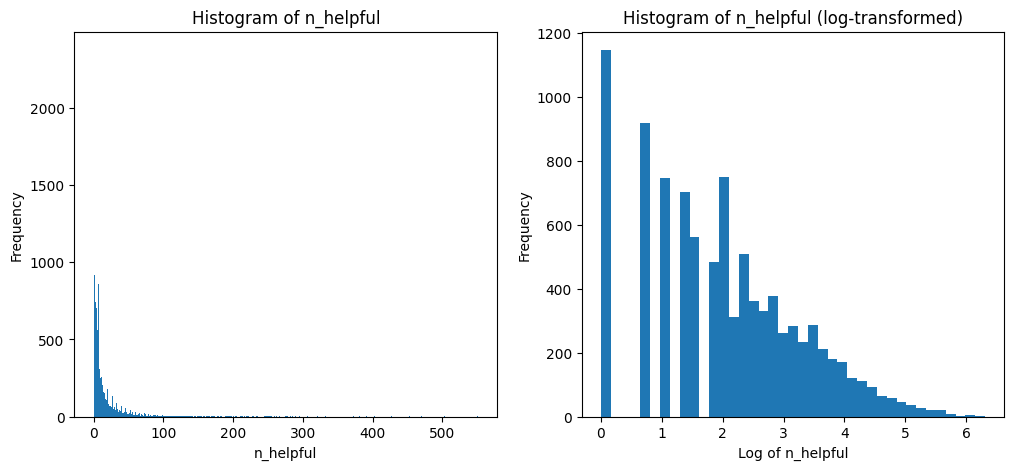

In [360]:
# Plotting histograms for each column separately + log transformed versions
numeric_cols = df_kdramas_reviews.select_dtypes(include=[np.number]).columns

for column in numeric_cols:
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    axs[0].hist(df_kdramas_reviews[column], bins='auto')
    axs[0].set_title(f'Histogram of {column}')
    axs[0].set_xlabel(column)
    axs[0].set_ylabel('Frequency')
    axs[1].hist(np.log(df_kdramas_reviews[column].where(df_kdramas_reviews[column] > 0)), bins='auto')
    axs[1].set_title(f'Histogram of {column} (log-transformed)')
    axs[1].set_xlabel(f'Log of {column}')
    axs[1].set_ylabel('Frequency')
    plt.show() # Display the histogram

Interesting observations from the histograms above:
- None of the histograms are normally distributed (or even close to it)
- `pop` is heavily right-skewed, meaning that most dramas have a low popularity, but a few dramas have a very high popularity (e.g. 4000+). As we saw in class, a log transformation makes the distribution more normal.
- Most of the score columns (`story_score`, `acting_cast_score`, `music_score`, `overall_score`) are left-skewed, meaning that most dramas have a relatively high score, but a few dramas have a very low score (e.g. 1-2). As we saw in class, a log transformation does not make the distribution more normal but skews it more to the left. The only potential exception is `rewatch_value_score`, which is bi-modal with a slight left skew, suggesting that most dramas fall into two categories: those that are highly rewatchable (9-10) and those that are not (1-2). 

In [132]:
from sklearn.feature_selection import VarianceThreshold
# First, let’s check the variance of the numerical features.
num_features = df_kdramas_reviews.select_dtypes(include=[np.number]).columns
variance = df_kdramas_reviews[num_features].var()
print("Variance of numerical features:")
print(variance)

# We choose a threshold, a good rule of thumb is to set the threshold to 0.01.
vt = VarianceThreshold(threshold=0.01)
X_num = df_kdramas_reviews[num_features].fillna(0)  # temporarily fill missing values for variance calculation
vt.fit(X_num)
features_to_keep = X_num.columns[vt.get_support()]

print("\nNumerical features to keep (variance above threshold):")
print(list(features_to_keep))

Variance of numerical features:
year                   5.648529e+00
tot_eps                2.764853e+02
duration               1.772554e+06
rank                   6.726605e+06
pop                    2.510923e+06
story_score            4.937486e+00
acting_cast_score      3.064984e+00
music_score            4.790095e+00
rewatch_value_score    9.527439e+00
overall_score          4.449025e+00
n_helpful              1.007066e+03
dtype: float64

Numerical features to keep (variance above threshold):
['year', 'tot_eps', 'duration', 'rank', 'pop', 'story_score', 'acting_cast_score', 'music_score', 'rewatch_value_score', 'overall_score', 'n_helpful']


In [133]:
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df_encoded = df_kdramas_reviews.copy()

# Numerical Data Transformations
num_cols = df_kdramas_reviews.select_dtypes(include=[np.number]).columns

# For Box-Cox transformation, the data must be positive.
for col in ['tot_eps', 'duration', 'rank', 'pop', 'music_score', 'story_score', 'acting_cast_score', 'rewatch_value_score', 'overall_score', 'n_helpful']:
    if col in df_encoded.columns:
        # Check for non-positive values and shift if necessary
        min_val = df_encoded[col].min()
        if min_val <= 0:
            df_encoded[col] = df_encoded[col] + abs(min_val) + 1
        transformed, lam = boxcox(df_encoded[col].fillna(1e-8))
        df_encoded[col + '_boxcox'] = transformed
        print(f"Applied Box-Cox transformation on {col} (lambda: {lam:.4f}).")
        # Optionally, drop or retain the original column

# Standardize numerical features
scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

# Normalize (MinMax scaling)
minmax = MinMaxScaler()
df_encoded[num_cols] = minmax.fit_transform(df_encoded[num_cols])

# Categorical Data Transformations
cat_cols = df_encoded.select_dtypes(include=["object"]).columns
print("\nCategorical columns before encoding:", list(cat_cols))

# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df_kdramas_reviews, columns=cat_cols, drop_first=True)

print("\nShape after one-hot encoding:", df_encoded.shape)
display(df_encoded)

Applied Box-Cox transformation on tot_eps (lambda: 0.3469).
Applied Box-Cox transformation on duration (lambda: 0.5127).
Applied Box-Cox transformation on rank (lambda: 0.3158).
Applied Box-Cox transformation on pop (lambda: 0.2601).
Applied Box-Cox transformation on music_score (lambda: 1.5708).
Applied Box-Cox transformation on story_score (lambda: 1.5267).
Applied Box-Cox transformation on acting_cast_score (lambda: 2.1707).
Applied Box-Cox transformation on rewatch_value_score (lambda: 0.8895).
Applied Box-Cox transformation on overall_score (lambda: 1.5932).
Applied Box-Cox transformation on n_helpful (lambda: 0.1307).

Categorical columns before encoding: ['kdrama_id', 'title', 'director', 'screenwriter', 'country', 'type', 'start_dt', 'end_dt', 'aired_on', 'org_net', 'content_rt', 'synopsis', 'user_id', 'review_text', 'ep_watched']

Shape after one-hot encoding: (10652, 22149)


,year,tot_eps,duration,rank,pop,story_score,acting_cast_score,music_score,rewatch_value_score,overall_score,...,ep_watched_9 of 10 episodes seen,ep_watched_9 of 11 episodes seen,ep_watched_9 of 12 episodes seen,ep_watched_9 of 120 episodes seen,ep_watched_9 of 14 episodes seen,ep_watched_9 of 16 episodes seen,ep_watched_9 of 32 episodes seen,ep_watched_9 of 9 episodes seen,ep_watched_92 of 120 episodes seen,ep_watched_99 of 99 episodes seen
0,2018.0,16.0,4500.0,882.0,140.0,7.0,8.0,8.0,5.0,7.0,...,False,False,False,False,False,False,False,False,False,False
1,2018.0,16.0,4500.0,882.0,140.0,8.0,10.0,8.0,8.0,8.0,...,False,False,False,False,False,False,False,False,False,False
2,2018.0,16.0,4500.0,882.0,140.0,8.0,9.5,8.0,7.5,8.5,...,False,False,False,False,False,False,False,False,False,False
3,2018.0,16.0,4500.0,882.0,140.0,6.0,7.0,7.0,5.5,6.5,...,False,False,False,False,False,False,False,False,False,False
4,2018.0,16.0,4500.0,882.0,140.0,5.5,8.0,8.0,5.0,7.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10647,2020.0,24.0,1800.0,1312.0,597.0,1.0,7.0,7.0,1.0,4.5,...,False,False,False,False,False,False,False,False,False,False
10648,2020.0,24.0,1800.0,1312.0,597.0,9.0,9.0,10.0,8.0,9.0,...,False,False,False,False,False,False,False,False,False,False
10649,2020.0,24.0,1800.0,1312.0,597.0,8.0,8.0,5.5,7.5,7.5,...,False,False,False,False,False,False,False,False,False,False
10650,2020.0,24.0,1800.0,1312.0,597.0,8.0,8.0,9.0,7.0,8.5,...,False,False,False,False,False,False,False,False,False,False


In [134]:
# First of all, let's check for empty values in the dataset and see how we should handle them
df_kdramas_reviews.isna().sum()

kdrama_id               228
title                     0
year                    228
director               1583
screenwriter           1967
country                 228
type                    228
tot_eps                 228
duration                228
start_dt                228
end_dt                  228
aired_on                487
org_net                1018
content_rt              228
synopsis                235
rank                    228
pop                     228
user_id                  33
story_score              33
acting_cast_score        33
music_score              33
rewatch_value_score      33
overall_score            33
review_text              33
ep_watched               33
n_helpful                33
dtype: int64

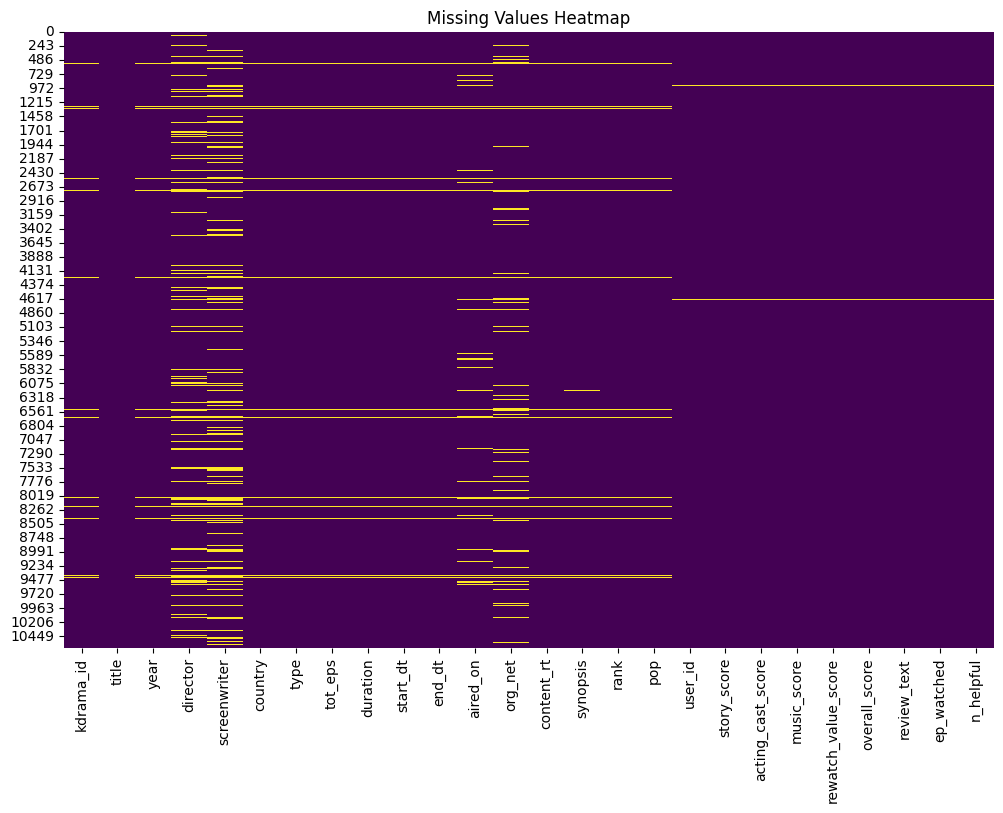

In [135]:
# Visualize missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df_kdramas_reviews.isna(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [136]:
# Drop rows where numeric_cols are nan
df_kdramas_reviews = df_kdramas_reviews.dropna(subset=numeric_cols)

In [102]:
# # # Narrow down to dramas from 2022 onwards to make the dataset more manageable
# df_merged_2022 = df_merged[df_merged['year'] >= 2022]

# df_merged_2022

In [138]:
### Feature Engineering
# Do sentiment analysis on the review text using a pre-trained DistilBERT model
from tqdm.auto import tqdm
from scripts.classify_sentiment import classify_sentiment_batch

# Classify the sentiment of each review in batches of 100 (parallel processing)
batch_size = 100
batches = [df_kdramas_reviews['review_text'][i:i+batch_size] for i in range(0, len(df_kdramas_reviews), batch_size)]
for batch in tqdm(batches, desc="Processing batches"):
    sentiments, confidences = classify_sentiment_batch(batch.to_list())
    df_kdramas_reviews.loc[batch.index, 'sentiment'] = sentiments
    df_kdramas_reviews.loc[batch.index, 'sentiment_confidence'] = confidences

df_kdramas_reviews

Processing batches:   0%|          | 0/104 [00:00<?, ?it/s]

/var/folders/gv/dhs3yrtj7qg404ybnlwrzsgh0000gn/T/ipykernel_18104/2077333723.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged.loc[batch.index, 'sentiment'] = sentiments
/var/folders/gv/dhs3yrtj7qg404ybnlwrzsgh0000gn/T/ipykernel_18104/2077333723.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged.loc[batch.index, 'sentiment_confidence'] = confidences


,kdrama_id,title,year,director,screenwriter,country,type,tot_eps,duration,start_dt,...,story_score,acting_cast_score,music_score,rewatch_value_score,overall_score,review_text,ep_watched,n_helpful,sentiment,sentiment_confidence
0,53c858d11a284859a1f50699b5aa6f51,100 Days My Prince,2018.0,"['Lee Jong Jae', 'Nam Sung Woo']",['Noh Ji Sul'],South Korea,Drama,16.0,4500.0,2018-09-10,...,7.0,8.0,8.0,5.0,7.0,"As a valid fan of the actor Kyungsoo, I had to...",16 of 16 episodes seen,14.0,positive,0.609725
1,53c858d11a284859a1f50699b5aa6f51,100 Days My Prince,2018.0,"['Lee Jong Jae', 'Nam Sung Woo']",['Noh Ji Sul'],South Korea,Drama,16.0,4500.0,2018-09-10,...,8.0,10.0,8.0,8.0,8.0,Talk about chemistry! D.O. and Nam Ji Hyun b...,16 of 16 episodes seen,7.0,negative,0.533518
2,53c858d11a284859a1f50699b5aa6f51,100 Days My Prince,2018.0,"['Lee Jong Jae', 'Nam Sung Woo']",['Noh Ji Sul'],South Korea,Drama,16.0,4500.0,2018-09-10,...,8.0,9.5,8.0,7.5,8.5,I didn't expect to like this drama as much as ...,16 of 16 episodes seen,16.0,positive,0.562456
3,53c858d11a284859a1f50699b5aa6f51,100 Days My Prince,2018.0,"['Lee Jong Jae', 'Nam Sung Woo']",['Noh Ji Sul'],South Korea,Drama,16.0,4500.0,2018-09-10,...,6.0,7.0,7.0,5.5,6.5,"Yet another Joseon drama, that adds nothing. ....",16 of 16 episodes seen,6.0,positive,0.529586
4,53c858d11a284859a1f50699b5aa6f51,100 Days My Prince,2018.0,"['Lee Jong Jae', 'Nam Sung Woo']",['Noh Ji Sul'],South Korea,Drama,16.0,4500.0,2018-09-10,...,5.5,8.0,8.0,5.0,7.0,I started this drama only for the sake of D.O....,16 of 16 episodes seen,8.0,negative,0.483764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10647,31f0ed457f9e4989966116dc6ba7a0d0,Zombie Detective,2020.0,['Shim Jae Hyun'],['Baek Eun Jin'],South Korea,Drama,24.0,1800.0,2020-09-21,...,1.0,7.0,7.0,1.0,4.5,Stupid AF This is a show that relies only on ...,24 of 24 episodes seen,9.0,negative,0.853435
10648,31f0ed457f9e4989966116dc6ba7a0d0,Zombie Detective,2020.0,['Shim Jae Hyun'],['Baek Eun Jin'],South Korea,Drama,24.0,1800.0,2020-09-21,...,9.0,9.0,10.0,8.0,9.0,Surprisingly Wholesome This is the first revi...,24 of 24 episodes seen,43.0,positive,0.495007
10649,31f0ed457f9e4989966116dc6ba7a0d0,Zombie Detective,2020.0,['Shim Jae Hyun'],['Baek Eun Jin'],South Korea,Drama,24.0,1800.0,2020-09-21,...,8.0,8.0,5.5,7.5,7.5,"Pure, Crazy Fun Despite how some of the still...",24 of 24 episodes seen,19.0,negative,0.579736
10650,31f0ed457f9e4989966116dc6ba7a0d0,Zombie Detective,2020.0,['Shim Jae Hyun'],['Baek Eun Jin'],South Korea,Drama,24.0,1800.0,2020-09-21,...,8.0,8.0,9.0,7.0,8.5,A Story About a Zombie You get the idea about...,24 of 24 episodes seen,20.0,positive,0.608520


That's certainly more manageable. Since we're interested in  popularity of the dramas, let's plot a scatter plot of the ranking vs popularity of the dramas to see if there are any outliers.